In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1) 
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


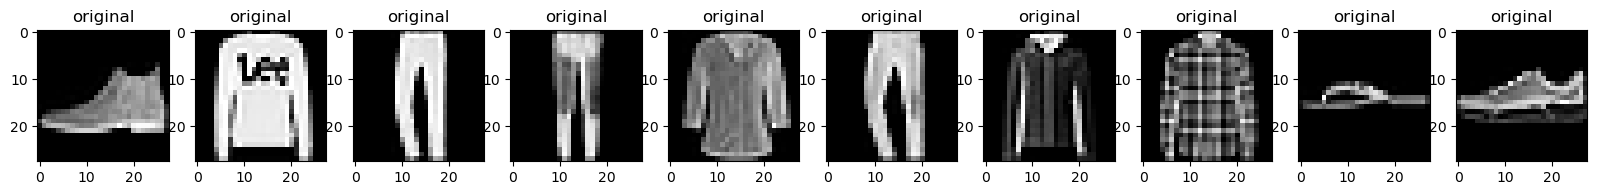

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [6]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
autoencoder = Vanilla_CNN()

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0123 - val_loss: 0.0047
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step -

In [10]:
autoencoder.encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
autoencoder.decoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

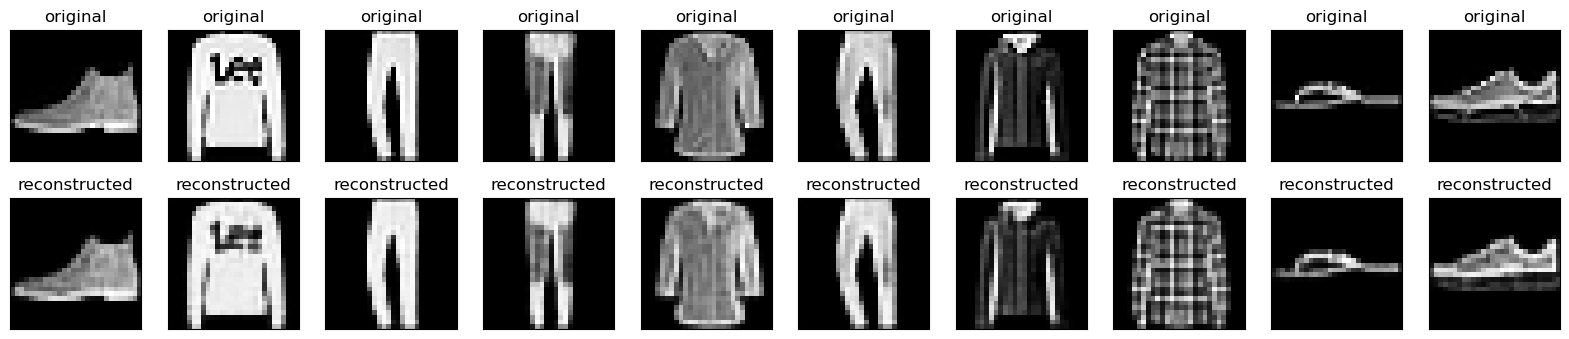

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original 
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Answer 

### Train the model with 30 epochs

In [30]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [32]:
autoencoder = Vanilla_CNN()

In [34]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [38]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0071 - val_loss: 0.0057
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - l

In [40]:
autoencoder.encoder.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
autoencoder.decoder.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 8)         584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

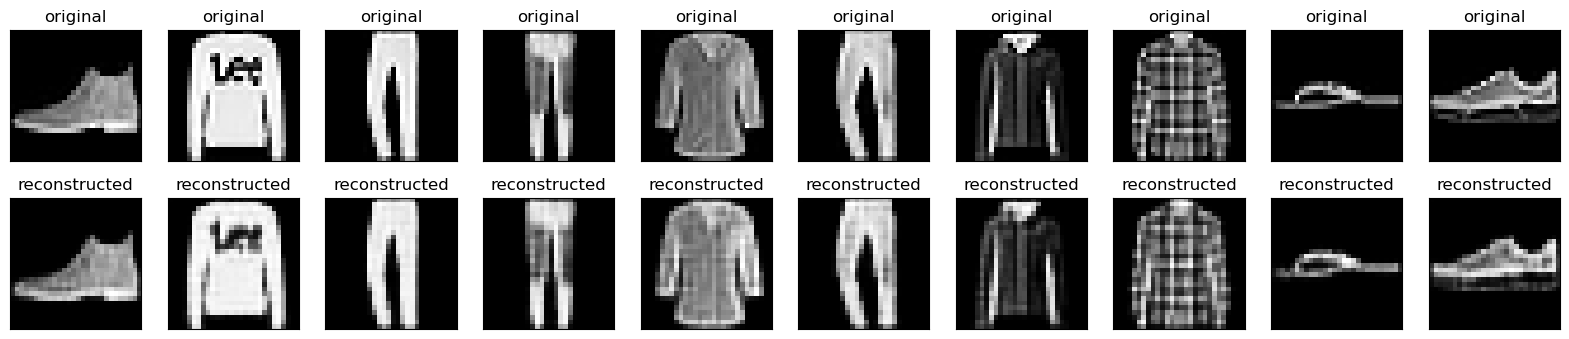

In [43]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original 
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

###  Write the code implementation to calculate the loss (Mean Squared Error) for the test dataset.

In [44]:
from sklearn.metrics import mean_squared_error


decoded_imgs_test = autoencoder.predict(x_test)
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_test_flat = decoded_imgs_test.reshape(len(decoded_imgs_test), -1)

# Mean Squared Error
mse_test = mean_squared_error(x_test_flat, decoded_imgs_test_flat)
print(f"Mean Squared Error : {mse_test:.4f}")

313/313 [==============================] - 1s 3ms/step
Mean Squared Error : 0.0023


Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - l

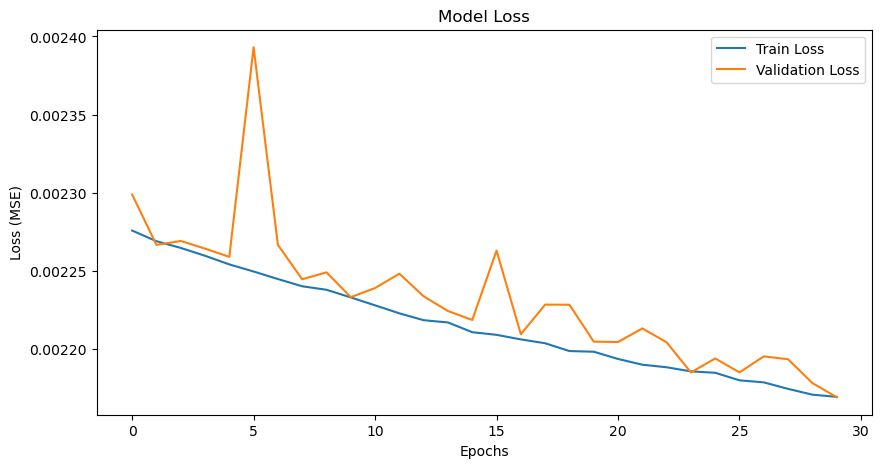

In [45]:
import matplotlib.pyplot as plt


history = autoencoder.fit(x_train, x_train,
                          epochs=30,
                          shuffle=True,
                          validation_data=(x_test, x_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()
